In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [10]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)

def phi(L):
    return((1.27*m*L)/E)

m=0.003 #delta m_square
E=1
L=linspace(0,1000,10)
th=1.107148718 # 2*mixing angle

In [11]:
backend=BasicAer.get_backend('qasm_simulator')
app_counts=[]
dis_counts=[]
Phi=phi(L)

for phi in Phi:
    qc.u(th,0,0,0)
    qc.u(0,0,phi,0)
    qc.u(-1*th,0,0,0)
    qc.measure(0,0)
    job=execute(qc,backend=backend,shots=1024).result().get_counts()
    if '0' in job:
            app_counts.append(job['0']/1024)
            dis_counts.append((1024-job['0'])/1024)
    else:
        app_counts.append(0)
        dis_counts.append(1)
    qc.reset(0)

In [14]:
l=linspace(0,1000,100)
def true_function(l):
    p= (0.8*(sin(m*l/E))**2)#appearance probability
    return(p)
Th_curve=true_function(l)

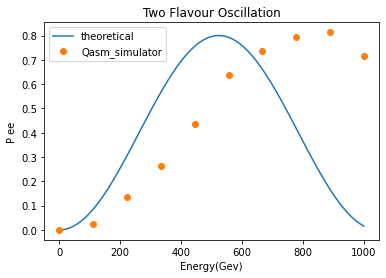

In [15]:
plot(l,Th_curve,label='theoretical')
plot(L,dis_counts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P ee')
legend()